# How did the year of COVID-19 affect world happiness?
### World Happiness: 2021 vs 2020

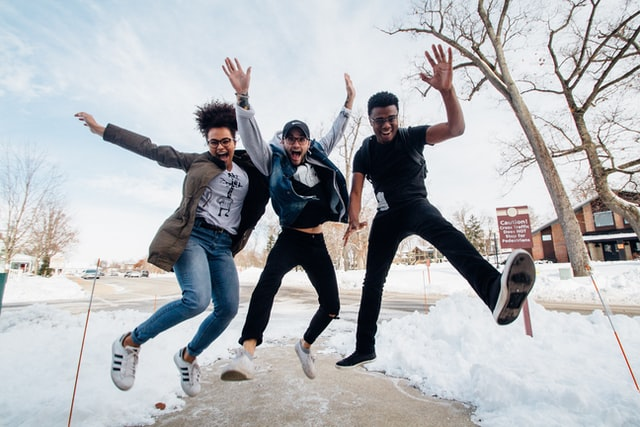

Photo by <a href="https://unsplash.com/@zacharytnelson?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Zachary Nelson</a> on <a href="https://unsplash.com/s/photos/happy?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

The 2021 World Happiness Report attempts to measure happiness around the world according to the following variables:

* Happiness score
* GDP per capita
* Healthy Life Expectancy
* Social support
* Freedom to make life choices
* Generosity
* Corruption Perception

This notebook will examine how the numbers in the lastest 2021 report differ from the year before.

I will be practicing visualizations using some custom facetgrids and gridspec with matplotlib and seaborn.

# Import + Prep data

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# from plotly.offline import init_notebook_mode
# init_notebook_mode(connected=True)
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

import textwrap

# display(plt.style.available)
# display(pio.renderers)
# display(pio.templates)

In [ ]:
plt.style.use('default')
plt.style.use('seaborn-white')
plt.style.use('seaborn-notebook')
sns.set_palette('Set2')

pio.templates.default = "seaborn"

In [ ]:
# create wide df

df20 = pd.read_csv('../input/world-happiness-report-20152021/2020.csv')
df21 = pd.read_csv('../input/world-happiness-report-20152021/2021.csv')

lcols = [0,1,2,6,7,8,9,10,11]
df20 = df20.iloc[:, lcols]
df21 = df21.iloc[:, lcols]

df20['Year'] = 2020
df21['Year'] = 2021

df = pd.concat([df21, df20])
df.rename(columns={'Country name': 'Country', 
                   'Regional indicator': 'Region', 
                   'Ladder score': 'Happiness score'}, inplace=True)
df['all'] = ''
# display(df)

df20 = df[df.Year == 2020]
df21 = df[df.Year == 2021]
# display(df20)

# create long df

dfM = df.melt(id_vars=['Country', 
                       'Region', 
                       'Year'], 
              value_vars=df.columns[2:-2], 
              var_name='Var', value_name='Value')
dfM['all'] = ''
# display(dfM)

In [ ]:
# create wide %change df

dfall = dfM.pivot(index=['Country', 'Region'], columns=['Var', 'Year'], values='Value').reset_index()

scorecols = df.columns[2:-2]
for col in scorecols:
    dfall[(col, '% Ch')] = ((dfall[(col, 2021)] - dfall[(col, 2020)])/dfall[(col, 2020)])*100
# display(dfall.sort_index(axis=1))

dfdiff = dfall[['Country', 'Region']].join(dfall.loc[:, pd.IndexSlice[:, '% Ch']])
# display(dfdiff)

dfdiff.columns = dfdiff.columns.to_flat_index().str.join(' ').str.rstrip(' ')
dfdiff.dropna(inplace=True)
# display(dfdiff)

# create long %change df

dfdiffM = dfdiff.melt(id_vars = dfdiff.columns[0:2], 
                      value_vars = dfdiff.columns[2:], 
                      var_name='Var', value_name='Value'
                     )
# dfdiffM['all'] = ''

# add feature
dfdiffM['% Change'] = dfdiffM.apply(lambda row: 'Positive' if row.Value > 0
                                  else 'Negative', 
                                  axis=1)
# display(dfdiffM)

In [ ]:
# export data

# dfdiff.to_csv('dfdiff.csv')
# dfdiffM.to_csv('dfdiffM.csv')
# dfall.sort_index(axis=1).to_csv('dfall.csv')

# data = dfall.set_index(['Country', 'Region']).sort_index(axis=1)
# data.columns = [f"{x}_{y}" for x, y in data.columns.to_flat_index()]
# data = data.reset_index().melt(id_vars=['Country', 'Region']) # from https://stackoverflow.com/questions/50571793/concise-way-of-flattening-multiindex-columns
# data[['Var','Year']] = data.variable.str.split("_",expand=True)
# data = data.drop('variable', axis=1)
# data.rename(columns = {'value':'Value'}, inplace = True)
# data['Year'] = data['Year'].replace(['% Ch'], '% Change')
# data = data[['Country', 'Region', 'Var', 'Year', 'Value']]
# display(data)

# data.to_csv('dfallM.csv')

***Full table:***

In [ ]:
display(dfall.sort_index(axis=1))

# Preliminary EDA

### Numeric variables
There are 7 variables that we'll examine. *From the appendix pdf:*

**Happiness score:**
> Happiness score or subjective well-being (variable name ladder): The survey
measure of SWB is from the Feb 26, 2021 release of the Gallup World Poll
(GWP) covering years from 2005 to 2020. Unless stated otherwise, it is the na-
tional average response to the question of life evaluations. The English wording
of the question is “Please imagine a ladder, with steps numbered from 0 at the
bottom to 10 at the top. The top of the ladder represents the best possible life
for you and the bottom of the ladder represents the worst possible life for you.
On which step of the ladder would you say you personally feel you stand at this
time?” This measure is also referred to as Cantril life ladder, or just life ladder
in our analysis.



In [ ]:
def hist(var):
    fig = px.histogram(df, x=var, 
                 marginal='box', 
                 color_discrete_sequence=px.colors.qualitative.Set3,
                )
    fig.update_layout(width=480, height=360)
    fig.show()

hist(scorecols[0])

**GDP per capita:**
>  The statistics of GDP per capita (variable name gdp) in purchasing power parity
(PPP) at constant 2017 international dollar prices are from the October 14,
2020 update of the World Development Indicators (WDI). The GDP ﬁgures
for Taiwan, Syria, Palestine, Venezuela, Djibouti and Ymen are from the Penn
World Table 9.1.

In [ ]:
hist(scorecols[1])

**Social support:**
> Social support (or having someone to count on in times of trouble) is the national
average of the binary responses (either 0 or 1) to the GWP question “If you
were in trouble, do you have relatives or friends you can count on to help you
whenever you need them, or not?”

In [ ]:
hist(scorecols[2])

**Health life expectancy:**
> Healthy Life Expectancy (HLE). Healthy life expectancies at birth are based
on the data extracted from the World Health Organization’s (WHO) Global
Health Observatory data repository (Last updated: 2020-09-28). The data at
the source are available for the years 2000, 2005, 2010, 2015 and 2016. To
match this report’s sample period (2005-2020), interpolation and extrapolation
are used.

In [ ]:
hist(scorecols[3])

**Freedom to make life choices:**
> Freedom to make life choices is the national average of responses to the GWP
question “Are you satisﬁed or dissatisﬁed with your freedom to choose what
you do with your life?”

In [ ]:
hist(scorecols[4])

**Generosity:**
> Generosity is the residual of regressing national average of response to the GWP
question “Have you donated money to a charity in the past month?” on GDP
per capita.

In [ ]:
hist(scorecols[5])

**Perceptions of corruption:**
> Corruption Perception: The measure is the national average of the survey re-
sponses to two questions in the GWP: “Is corruption widespread throughout
the government or not” and “Is corruption widespread within businesses or
not?” The overall perception is just the average of the two 0-or-1 responses. In
case the perception of government corruption is missing, we use the perception
of business corruption as the overall perception. The corruption perception at
the national level is just the average response of the overall perception at the
individual level.

In [ ]:
hist(scorecols[6])

### Countries and Regions

**How many countries are in the report?**

In [ ]:
cc = df.Country.nunique()
data = df
fig = px.choropleth(data, locations='Country', 
                    locationmode='country names',
#                     color='Country',
#                     basemap_visible=False,
                    fitbounds='locations',
                    color_discrete_sequence=px.colors.qualitative.Set3,
                    title=(str(cc) + ' Total Countries'),
                   )
fig.update_layout(height=540)
fig.show()

**How many countries are in each region?**

In [ ]:
data = df.groupby('Region').Country.nunique().sort_values(ascending=False)
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(5,3))
    sns.barplot(y=data.index, x=data, palette='Set3')
    plt.gca().set_xlabel('Country Count')
    sns.despine(left=True, bottom=True)

***Expand for table:***

In [ ]:
display(data.to_frame())

**Which countries are in each region?**

In [ ]:
region = df.Region.unique()[0]
data = df
fig = px.choropleth(data, locations='Country', 
                    locationmode='country names',
#                     color='Country',
                    animation_frame = 'Region',
#                     basemap_visible=False,
                    fitbounds='locations',
                    color_discrete_sequence=px.colors.qualitative.Pastel1,
                    title=('Countries in each region'),
                   )
fig.update_layout(width=640)
fig.show()

***Expand for full list:***

In [ ]:
s = df.groupby('Region').Country.unique()
for i in range(len(s)-1):
    print(s.index[i]+':')
    print(s[i])
    print()

**Which countries have 2020 data, but no 2021 data?**

In [ ]:
countries = set(df20.Country) - set(df21.Country)
data = df[df.Country.isin(countries)]
fig = px.choropleth(data, locations='Country', 
                    locationmode='country names',
                    color='Country',
#                     animation_frame = 'Region',
#                     basemap_visible=False,
                    fitbounds='locations',
                    color_discrete_sequence=px.colors.qualitative.Set3,
                    title=('Countries missing from 2021 report'),
                   )
fig.update_layout(width=640, height=360)
fig.show()

**Which countries have 2021 data, but no 2020 data?**

In [ ]:
countries = set(df21.Country) - set(df20.Country)
data = df[df.Country.isin(countries)]
fig = px.choropleth(data, locations='Country', 
                    locationmode='country names',
                    color='Country',
                    fitbounds='locations',
                    scope='europe',
                    color_discrete_sequence=px.colors.qualitative.Set3,
                    title=('Countries added in 2021 report'),
                   )
fig.update_layout(width=480, height=360)
fig.show()

# 2021 vs 2020: World Maps

### Latest Values
First, the values from the latest report:

In [ ]:
data = dfM[dfM.Year == 2021]
fig = px.choropleth(data, locations='Country', locationmode='country names', 
                    color='Value',
                    animation_frame = 'Var',
                    basemap_visible=False,
                    color_continuous_scale='Purpor_r',
                    title=('Values from 2021 Report')
                   )
fig.update_layout(height=600)
fig.show()

### Percent Change from Previous Year
The percent change from 2020 to 2021:

In [ ]:
data = dfdiffM
fig = px.choropleth(data, locations='Country', locationmode='country names', 
                    color='Value',
                    animation_frame = 'Var',
                    basemap_visible=False,
                    color_continuous_scale='Tropic',
                    color_continuous_midpoint=0, title=('Percent Change (2020 to 2021)')
                   )
fig.update_layout(height=600)
fig.show()

# Variable Comparison (FacetGrid)
There are a number of ways we can look at each variable in further detail.

**Comparing all variables for all countries, 2021 vs 2020:**

In [ ]:
g = sns.displot(data=dfM, x='Value', col='Var', hue='Year', kind='kde', 
                col_wrap=2, 
                palette=sns.color_palette()[2:4],
                height=1.25, aspect=3, 
                facet_kws={'sharey': False, 'sharex': False}
               )
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('All Countries 2021 vs 2020', size=16)
g.set_axis_labels('','')
sns.despine(left=True)

The distributions are quite close together and it isn't easy to see the differences. **We'll add percent change:**

In [ ]:
def varcompare(df1=df, df2=dfdiff, region=None):
    diffcols = dfdiff.columns[2:]
    fig, axes = plt.subplots(7, 2, figsize=(8,7))
    
    if region:
        df1 = df[df.Region == region]
        df2 = dfdiff[dfdiff.Region == region]
        fig.suptitle(region, size=16)
    else:
        fig.suptitle('All countries', size=16)

    for i, var in enumerate(scorecols):
        sns.kdeplot(data=df1, x=var, hue='Year', ax=axes[i][0], palette=sns.color_palette()[2:4])
        axes[i][0].set_ylabel(textwrap.fill(var, 12), rotation=0, horizontalalignment='right')
        axes[i][0].set_xlabel('')
        axes[i][0].set_yticklabels([])

    for i, var in enumerate(diffcols):
        sns.boxplot(data=df2, x=var, ax=axes[i][1], palette=[sns.color_palette()[-1]])
        axes[i][1].set_xlabel('')

    for i in range(1, 7):
        axes[i][0].legend_.remove()

#     axes[0][0].set_title('2021 vs 2020')
    axes[0][1].set_title('% Change (2020 to 2021)')

    plt.tight_layout()
    sns.despine(left=True)
#     fig.subplots_adjust(top=0.90)
    plt.show()

varcompare()

**Same comparison, but for each region:**

In [ ]:
region = df.Region.unique()[0]
varcompare(region=region)

***Expand for all regions:***

In [ ]:
regions = df.Region.unique()
for i in range(1, len(regions)):
    varcompare(region=regions[i])

**We can also compare regions for each variable:**

In [ ]:
def regioncompare(var):
    s = df.groupby('Region')[var].median().sort_values(ascending=False)
    with sns.axes_style("whitegrid"):
        plt.figure()
        sns.violinplot(data=df, x=var, y='Region', hue='Year', 
                       order=s.index,
                       split=True, 
                       palette = sns.color_palette()[2:4],
                       inner='quartiles')
        plt.gca().set_yticklabels([textwrap.fill(t.get_text(), 18)  for t in plt.gca().get_yticklabels()])
        plt.gca().legend(loc='upper left')
        plt.gca().set_title(var + ', by region desc')
        plt.gca().set_xlabel("")
        plt.gca().set_ylabel("");
        sns.despine(bottom=True, left=True)

var=scorecols[0]
regioncompare(var)

***Expand for all variables:***

In [ ]:
for i in range(1, len(scorecols)):
    regioncompare(scorecols[i])

# Variable Comparison (GridSpec)
Let's put the previous comparisons together into one graphic, and add the top and bottom ranked countries.

In [ ]:
def vardetail(var):
    color20 = sns.color_palette()[2]
    color21 = sns.color_palette()[3]

    fig = plt.figure(figsize=(9,9), 
#                      constrained_layout=True
                    )

    gs = fig.add_gridspec(5,3)
    ax = fig.add_subplot(gs[:1, :])
    ax1 = fig.add_subplot(gs[1:3, 1])
    ax2 = fig.add_subplot(gs[1:3, 2])
    ax3 = fig.add_subplot(gs[3:, 1])
    ax4 = fig.add_subplot(gs[3:, 2])
    ax5 = fig.add_subplot(gs[1:, :1])

#     sns.violinplot(data=df, x=var, y='all', hue='Year', split=True, 
#                    palette=[color19, color20], inner='quartiles', ax=ax)
    sns.kdeplot(data=df, x=var, hue='Year', palette=[color20, color21], ax=ax)
#     ax.set_title('All Countries')
    ax.set_xlabel("")
    ax.set_ylabel("")
#     ax.legend(loc='upper left')
#     ax.legend(bbox_to_anchor=(0, 1))
    
    # 2020 top
    order = rank(df20, var, False)
    sns.barplot(data=df20, y='Country', x=var, order=order.head(10), palette=[color20], ax=ax1)
    ax1.set_title('Top 10 Countries')
    ax1.set_xlabel("")
    ax1.set_ylabel("2020", size=12)
    ax1.set_yticklabels([textwrap.fill(t.get_text(), 15)  for t in ax1.get_yticklabels()])

    # 2020 bottom
    order = rank(df20, var)
    sns.barplot(data=df20, y='Country', x=var, order=order.head(10), palette=[color20], ax=ax2)
    ax2.set_title('Bottom 10 Countries')
    ax2.set_xlabel("")
    ax2.set_ylabel("")
    ax2.set_yticklabels([textwrap.fill(t.get_text(), 15)  for t in ax2.get_yticklabels()])

    # 2021 top
    order = rank(df21, var, False)
    sns.barplot(data=df21, y='Country', x=var, order=order.head(10), palette=[color21], ax=ax3)
    ax3.set_xlabel("")
    ax3.set_ylabel("2021", size=12)
    ax3.set_yticklabels([textwrap.fill(t.get_text(), 15)  for t in ax3.get_yticklabels()])

    # 2021 bottom
    order = rank(df21, var)
    sns.barplot(data=df21, y='Country', x=var, order=order.head(10), palette=[color21], ax=ax4)
    ax4.set_xlabel("")
    ax4.set_ylabel("")
    ax4.set_yticklabels([textwrap.fill(t.get_text(), 15)  for t in ax4.get_yticklabels()])
    
    # by Region
    s = df.groupby('Region')[var].median().sort_values(ascending=False)
    sns.violinplot(data=df, x=var, y='Region', hue='Year', order=s.index,
                   palette=[color20, color21], split=True, inner='quartiles', ax=ax5)
    ax5.set_yticklabels([textwrap.fill(t.get_text(), 14)  for t in ax5.get_yticklabels()])
    ax5.set_title('Region, desc')
    ax5.set_xlabel("")
    ax5.set_ylabel("")
    ax5.legend_.remove()
    
    plt.suptitle(var + ', 2021 vs 2020', size=18)
    plt.tight_layout()
    sns.despine(left=True, bottom=True)
#     ax5.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    fig.show()

In [ ]:
def rank(df, var, asc=True):
    data = df[['Country', var]].sort_values(by=var, ascending=asc)
    return data['Country']

def varchange(var):
    color = sns.color_palette()[-1]
    colorP = sns.color_palette()[4]
    colorN = sns.color_palette()[5]
    
    fig=plt.figure(figsize=(8,6), 
#                    constrained_layout=True
                  )
    gs = fig.add_gridspec(5,2)
    ax = fig.add_subplot(gs[:1, :])
    ax1 = fig.add_subplot(gs[1:, 1])
    ax2 = fig.add_subplot(gs[1:3, 0])
    ax3 = fig.add_subplot(gs[3:, 0])

    # box
    sns.boxplot(data=dfdiff, x=var, orient='h', palette=[color], ax=ax)
    ax.set_xlabel("")

    # pos/neg counts
    data = dfdiffM[dfdiffM.Var == var]
    data['% Change'].value_counts().plot.pie(ax=ax1, labels = ['Positive', 'Negative'], colors=[colorP, colorN])
    # alternate: bar
    # sns.countplot(data=data, x='% Change', order=['Positive', 'Negative'], ax=ax4)
    ax1.set_title('Country Counts')
    ax1.set_xlabel("")
    ax1.set_ylabel("")

    # top 10
    order = rank(dfdiff, var, False)
    sns.barplot(data=dfdiff, y='Country', x=var, order=order.head(10), palette=[colorP], ax=ax2)
    ax2.set_title('Top 10 Countries')
    ax2.set_xlabel("")
    ax2.set_ylabel("")

    # bottom 10
    order = rank(dfdiff, var)
    sns.barplot(data=dfdiff, y='Country', x=var, order=order.head(10), palette=[colorN], ax=ax3)
    ax3.set_title('Bottom 10 Countries')
    ax3.set_xlabel("")
    ax3.set_ylabel("")

    plt.suptitle(var + 'ange (2020 to 2021)', size=16)
    plt.tight_layout()
    sns.despine(left=True, bottom=True)
    ax.spines['bottom'].set_visible(True)

    fig.show()

diffcols = dfdiff.columns[2:]

### Comparing 2021 vs 2020 by variable:

In [ ]:
num = 0
vardetail(scorecols[num])

### Comparing Percent Change by variable:

In [ ]:
varchange(diffcols[num])

***Expand for all variables:***

In [ ]:
for i in range(1, len(scorecols)):
    vardetail(scorecols[i])
    varchange(diffcols[i])

**Thanks for reading, any comments or suggestions are welcome!**

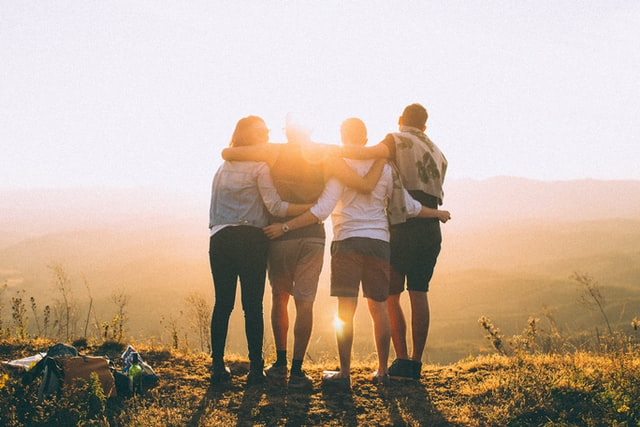

Photo by <a href="https://unsplash.com/@wildlittlethingsphoto?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Helena Lopes</a> on <a href="https://unsplash.com/s/photos/happy?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>